        mapper = {
            "0": "choroidal neovascularization", # cnv + amd?
            "1": "diabetic retinopathy", # dr
            "2": "amd", # amd
            "3": "normal", # normal
        }
        
        
        lbl = lbl_word[mapper]


In [1]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r'../examples/example_data/octa500/lbls_6x6.csv', sep=",")
# df = pd.read_csv(r"E:\Christina\MIL_Data\octa_whole_octa500_6_faz_unknown\labels\text_labels.csv", delimiter=';')

# 		img_path	msk_path	mode	weight

img_id = 200 # from 1
mask_id = 199 # from zero

print(df["Disease"].unique())

df.head(5)

['NORMAL' 'OTHERS' 'AMD' 'DR' 'CNV' 'RVO' 'CSC']


,ID,Sex,OS/OD,Age,Disease
0,10001,M,OD,55,NORMAL
1,10002,F,OD,37,OTHERS
2,10003,M,OS,57,OTHERS
3,10004,M,OD,53,AMD
4,10005,M,OS,27,DR


In [2]:
mapper = {
            "CNV": 0, # cnv + amd?
            "DR" : 1, # dr
            "AMD" : 2, # amd
            "NORMAL" : 3, # normal
            "OTHERS" : -1,
            "CSC": -1,
            "RVO": -1
        }
        
df_transformed = pd.DataFrame()
df_transformed["img_id"] = df["ID"]
df_transformed["img_path"] = "C://Users/Prinzessin/projects/decentnet/datasceyence/examples/example_data/octa500/imgs_6x6/" + df["ID"].astype(str) + "_200.bmp" # '10001' df["ID"].astype(str)
df_transformed["msk_path"] = "C://Users/Prinzessin/projects/decentnet/datasceyence/examples/example_data/octa500/msks_6x6/" + df["ID"].astype(str) + ".mat" # df["ID"].astype(str)
df_transformed["mode"] = "test"
df_transformed["lbl_disease"] = df["Disease"].map(mapper)
df_transformed["sex"] = df["Sex"]
df_transformed["os-od"] = df["OS/OD"]
df_transformed["age"] = df["Age"]

df_transformed = df_transformed[df_transformed['lbl_disease'] != -1]


df_transformed.to_csv("data_octa500.csv", index=False, sep=';')

df_transformed


,img_id,img_path,msk_path,mode,lbl_disease,sex,os-od,age
0,10001,C://Users/Prinzessin/projects/decentnet/datasc...,C://Users/Prinzessin/projects/decentnet/datasc...,test,3,M,OD,55
3,10004,C://Users/Prinzessin/projects/decentnet/datasc...,C://Users/Prinzessin/projects/decentnet/datasc...,test,2,M,OD,53
4,10005,C://Users/Prinzessin/projects/decentnet/datasc...,C://Users/Prinzessin/projects/decentnet/datasc...,test,1,M,OS,27
6,10007,C://Users/Prinzessin/projects/decentnet/datasc...,C://Users/Prinzessin/projects/decentnet/datasc...,test,3,M,OD,24
7,10008,C://Users/Prinzessin/projects/decentnet/datasc...,C://Users/Prinzessin/projects/decentnet/datasc...,test,0,F,OD,51
...,...,...,...,...,...,...,...,...
287,10288,C://Users/Prinzessin/projects/decentnet/datasc...,C://Users/Prinzessin/projects/decentnet/datasc...,test,2,M,OD,64
289,10290,C://Users/Prinzessin/projects/decentnet/datasc...,C://Users/Prinzessin/projects/decentnet/datasc...,test,3,F,OD,49
290,10291,C://Users/Prinzessin/projects/decentnet/datasc...,C://Users/Prinzessin/projects/decentnet/datasc...,test,0,F,OD,29
296,10297,C://Users/Prinzessin/projects/decentnet/datasc...,C://Users/Prinzessin/projects/decentnet/datasc...,test,1,M,OD,48


In [3]:
print(df['Disease'].unique())
print("*"*10)
print(df["Disease"].value_counts())

['NORMAL' 'OTHERS' 'AMD' 'DR' 'CNV' 'RVO' 'CSC']
**********
OTHERS    96
NORMAL    91
AMD       43
DR        35
CSC       14
CNV       11
RVO       10
Name: Disease, dtype: int64


In [4]:
import os
import glob
base_path = "../examples/example_data/octa500"



for i, row in df.iterrows():
    path = os.path.join(*[base_path, str(row["ID"]), "*"])
    images = glob.glob(path)
    for image in images:
        pass # print(image)
    


In [5]:
import scipy.io
mat = scipy.io.loadmat(os.path.join(base_path, "msks_6x6/10001.mat")    )

In [6]:
mat['Layer'].shape

# layer, a, b - or b a 

(6, 400, 400)

TypeError: Image data of dtype object cannot be converted to float

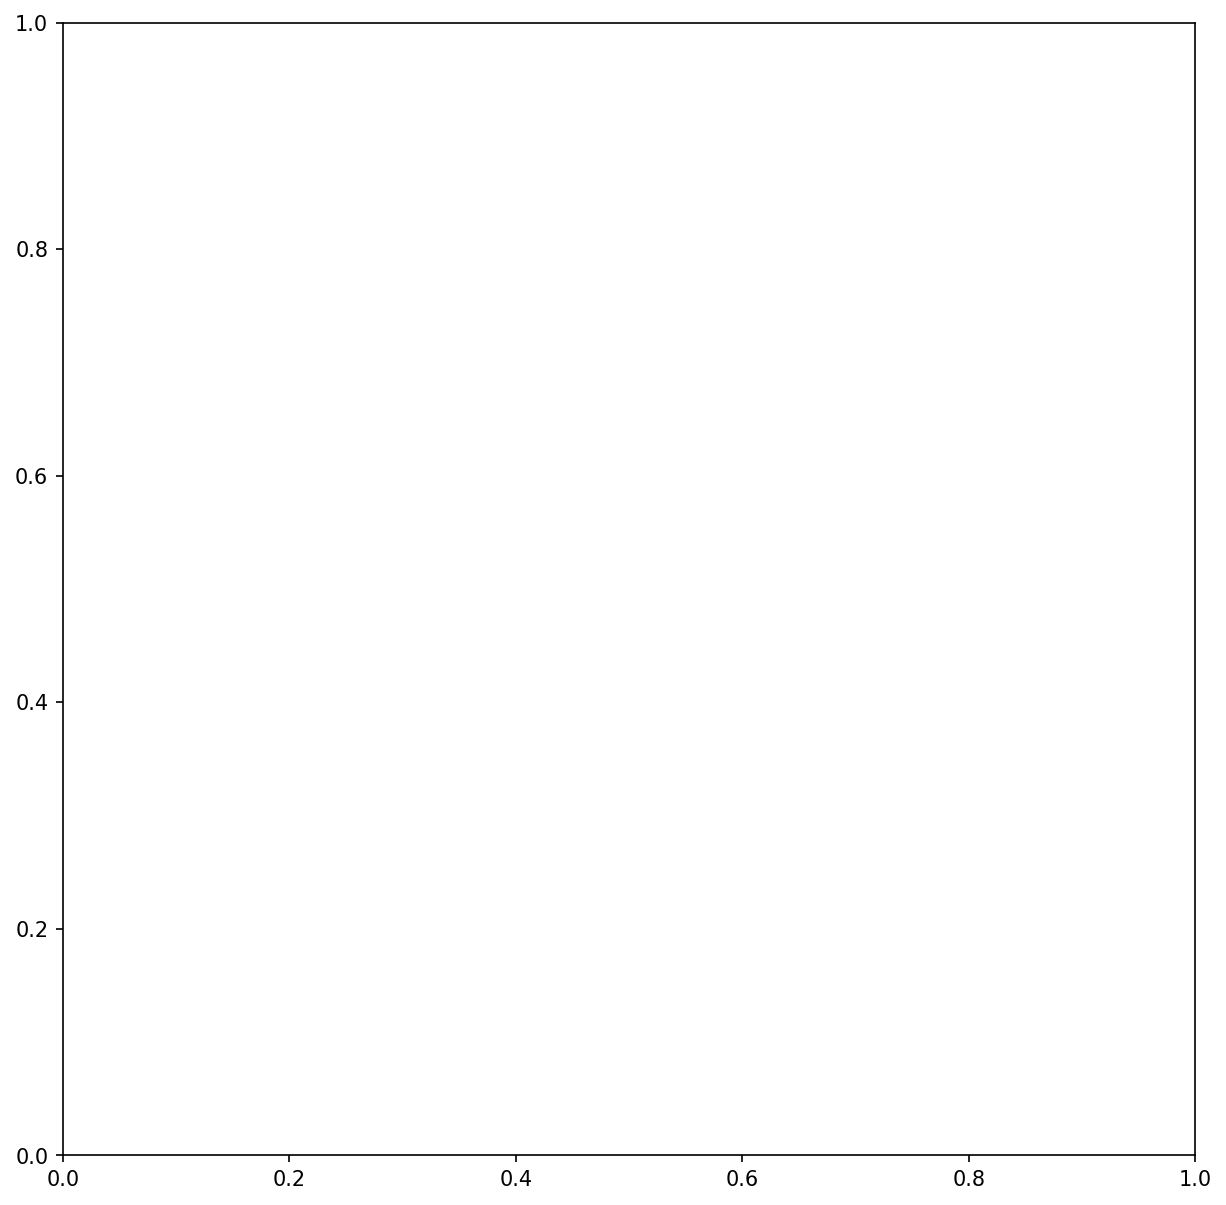

In [7]:
import matplotlib.pyplot as plt
import cv2
import os

image = cv2.imread(os.path.join(base_path, "10001/200.bmp"))

fs=(10,10)
dpi = 150
fig, ax=plt.subplots(figsize=fs, dpi=dpi)

plt.imshow(image)
plt.plot(mat['Layer'][0, mask_id])
plt.plot(mat['Layer'][1, mask_id])
plt.plot(mat['Layer'][2, mask_id])
plt.plot(mat['Layer'][3, mask_id])
plt.plot(mat['Layer'][4, mask_id])
plt.plot(mat['Layer'][5, mask_id])
#plt.gca().invert_yaxis()
plt.show()